In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

The $z$-test is used to confirm or refute an assumption about the (unknown) *population mean*, based on a sufficiently large sample.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

In [2]:
# Properties of the sample:
n = 30      # sample size
sm = 3.483  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 3.483$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [3]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.03420
p < a: reject H0


An alternative method is to determine the critical region, i.e. the set of all values for the sample mean where $H_0$ may be rejected. The boundary of that area is called the critical value $g$. To the left of it you can't reject $H_0$ (acceptance region), to the right you can (critical region). The area of the acceptance region is $1 - \alpha$, the area of the critical region is $\alpha$.

In [5]:
# Critical value according to the formula in the lecture slides
#g = m0 + stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(a, loc=m0, scale=s / np.sqrt(n)) #
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 3.465
sample mean = 3.483 > g = 3.465: reject H0


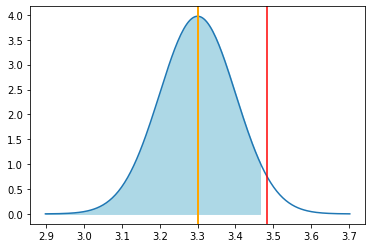

In [6]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')

### The left-tailed $z$-test

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu < 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

In [ ]:
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n)) # Let op! cdf() ipv sf()!
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

### The two-tailed $z$-test

When we don't want to test whether the population mean is either greater or lower than a hypothetical value, but only want to know if the sample mean is "close enough", we can use a two-tailed $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu \ne 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

In [ ]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < a/2):
    print("p < a/2, dus H0 verwerpen")
else:
    print("p > a/2, dus H0 niet verwerpen")

In [ ]:
g1 = m0 - stats.norm.isf(a/2) * s / np.sqrt(n)
g2 = m0 + stats.norm.isf(a/2) * s / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < sm and sm < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % sm)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % sm)

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=m0, scale=s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=m0, scale=s/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue')

### Right-tailed $t$-test

Suppose that the superhero researchers were unable to take a sufficiently large sample due to time constraints and only made $n = 20$ observations, with the same sample mean $\overline{x} = 3,483$. The standard deviation in this sample turned out to be $s = 0.55$.

In these circumstances, with the same significance level $\alpha = 0.05$, can we sustain the conclusion that superheroes save *more* than 3.3 people every day?

The testing procedure then goes as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 20      # sample size
sm = 3.483  # sample mean
ss = 0.55   # sample(!) standard deviation
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

In [ ]:
# Remark that we use the t-distribution here!
p = p = stats.t.sf(sm, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

In [ ]:
g = stats.t.isf(a, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * ss/np.sqrt(n), m0 + 4 * ss/np.sqrt(n), num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=m0, scale=ss/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')